# Simple Linear Regression - Basit Doğrusal Regresyon
- Bir tane bağımsız değişken ve bir tane bağımlı değişken arasındaki ilişkiyi ifade eden bir doğrusal fonksiyonu bulmaktır.

# Anakitle Modeli
- Y = b0 + b1X + £ 

# Örneklem Modeli
- yi = b0 + b1Xi + ei

# Tahmin Modeli 
- ^yi = b0 + b1Xi 
- (eğim formülü aslında: y = mx + n) en sonun da bu hale getirecez. 

# Hatalar/Artıklar
- ei = yi - ^yi
- ei = gerçek değerler ile tahmin edilen değerler arasındaki fark.

# Değişkenlerin Görevleri
- b0,b1 bağımsız değişkenin katsayılarıdır.
- b0 = Doğrunun Y eksenin kestiği nokta
- b1 = Doğrunun eğimi
- £ = Hata terimi
- ei = hatalar/artıklar
- yi = gerçek değerler
- ^yi = tahmin edilen değerler
- Y = bağımlı değişken
- X = Bağımsız değişken




In [2]:
import pandas as pd
df = pd.read_csv("./Advertising.csv")
df = df.iloc[:,1:len(df)] 
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.shape

(200, 4)

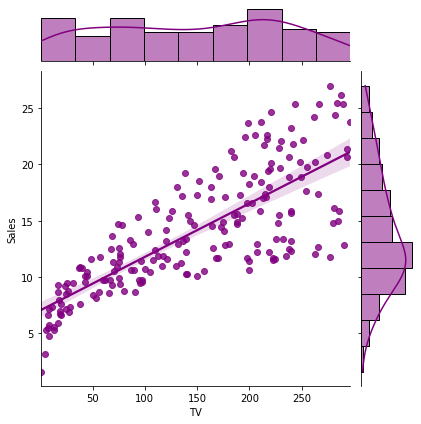

In [5]:
import seaborn as sns
sns.jointplot(x="TV", y="Sales",data=df,kind="reg",color="purple")

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# X bağımsız değişken 
X = df[["TV"]] 

In [8]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [9]:
y = df[["Sales"]]

In [10]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [11]:
y = df[["Sales"]]

In [12]:
reg = LinearRegression()
?reg

Type:        LinearRegression
String form: LinearRegression()
File:        c:\users\halil\anaconda3\lib\site-packages\sklearn\linear_model\_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator 

In [54]:
# fit, modeli oluşturmak anlamındadır. Yani model oluşturma işlemidir.
model = reg.fit(X,y)

In [55]:
# Doğrusal (Basit) Regresyon modeli oluşturulmuş oldu
model

LinearRegression()

In [56]:
str(model)

'LinearRegression()'

In [57]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [58]:
# intercept_ sabit demektir yani b0 değeridir.. ve model den sabiti çektik
model.intercept_

array([7.03259355])

In [59]:
# buda b1 değeridir. yani eğimi
model.coef_

array([[0.04753664]])

In [60]:
# rkare = bağımlı değişkendeki değişikliğin bağımsız değişkenlerce açıklanması durumudur.
model.score(X,y)

0.611875050850071

# Tahmin 

C:\Users\halil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


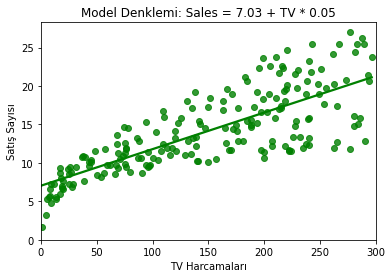

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["Sales"], ci= None, color="g")
g.set_title("Model Denklemi: Sales = 7.03259355 + TV * 0.04753664")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(0,300)
plt.ylim(bottom=0);

Sales = 7.03 + TV*0.05

In [127]:
# burada TV için elle bir değer girdik ve grafikten yola çıkarak tahmini edilen bir sonuça ulaştık.
7.03 + 150*0.04753664

14.160496

In [128]:
model.intercept_ + 150 * model.coef_

array([[14.16308961]])

In [129]:
# Yukarıda sklearn kütüphanesini kullanarak bu modeli fixleyip oluşturmuştuk ve şimdi o kütüphaneye göre tahmin işlemini optimize etmiş olacaz.
model

LinearRegression()

In [132]:
# Burada  sklearn ün sınıfından predict() fonk.nunu kullanarak bir tahmin işlemi yaptırdık. Yani Elle girilen bir tahmin işlemi yapmamış olduk. 
model.predict([[150]]) 

array([[14.16308961]])

In [133]:
yeni_veri = [[100],[150],[300]]

In [134]:
model.predict(yeni_veri)

array([[11.78625759],
       [14.16308961],
       [21.29358568]])

# Artıklar(Hatalar) ve Makine Öğrenmesindeki Önemi
- MSE: Hata Kareler Ortalaması
- RMSE: Hata Kareler Ortalamasının Karekökü

In [135]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [138]:
# Tahmin edilen değerler
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [141]:
gercek_y = y[0:10]

In [142]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [172]:
# concat ile verileri birleştirme işlemi yaptık
hatalar = pd.concat([gercek_y,tahmin_edilen_y], axis = 1)

In [173]:
hatalar.columns = ["gercek_y","tahmin_edilen_y"]

In [174]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [175]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [176]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [177]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [178]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [180]:
import numpy as np
hata_ortalama = np.mean(hatalar["hata_kareler"])

In [181]:
hata_ortalama

9.290350329638105